# K-means Clustering from Scratch (Iris Dataset)
Кластеризація - це  розділення набору даних на групи за схожими ознаками, де точки даних у тій самій групі максимально схожі, а точки даних у різних групах є максимально різними. Ми використовуємо кластеризацію у своєму повсякденному житті; наприклад, у супермаркеті овочі згруповані як одна група, а фрукти - як інша група. Такого роду кластеризація допомагає клієнтам прискорити процес пошуку потрібних продуктів і покупок вцілому.
![title](https://intellipaat.com/blog/wp-content/uploads/2019/05/K_Means_1.png)
## Алгоритм k-середніх
Маємо масив об'єктів, кожен з яких має певні значення по ряду ознак. Відповідно до цих значень об'єкт розташовується у багатовимірному просторі.

* Визначаємо кількість кластерів, що необхідно утворити
* Випадковим чином обираємо k спостережень, які на цьому кроці вважаються центрами кластерів
* Кожне спостереження «приписується» до одного з n кластерів — того, відстань до якого найкоротша
* Розраховуємо новий центр кожного кластера як елемент, ознаки якого розраховуються як середнє арифметичне ознак об'єктів, що входять у цей кластер
* Робимо таку кількість ітерацій (повторюються кроки 3-4), поки кластерні центри стануть стійкими (тобто при кожній ітерації в кожному кластері опинятимуться одні й ті самі об'єкти), дисперсія всередині кластера буде мінімізована, а між кластерами — максимізована
![title](https://miro.medium.com/max/2040/1*n28Vz-JMfrYsEOMtrjNMTw.png)

# Підключаємо бібліотеки

In [51]:
from copy import deepcopy
import numpy as np
from scipy.spatial import distance
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Зчитуємо датасет ірисів та забираємо деякі колонки(ті що не містять потрібних числових даних)

In [104]:
iris=pd.read_csv("Iris.csv")
iris.drop('Id',axis=1,inplace=True)
iris.drop('Species',axis=1,inplace=True)

In [105]:
iris.shape

(150, 4)

In [106]:
iris.sample()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
79,5.7,2.6,3.5,1.0


# Візуалізуємо дані

Text(0, 0.5, 'SepalWidthCm')

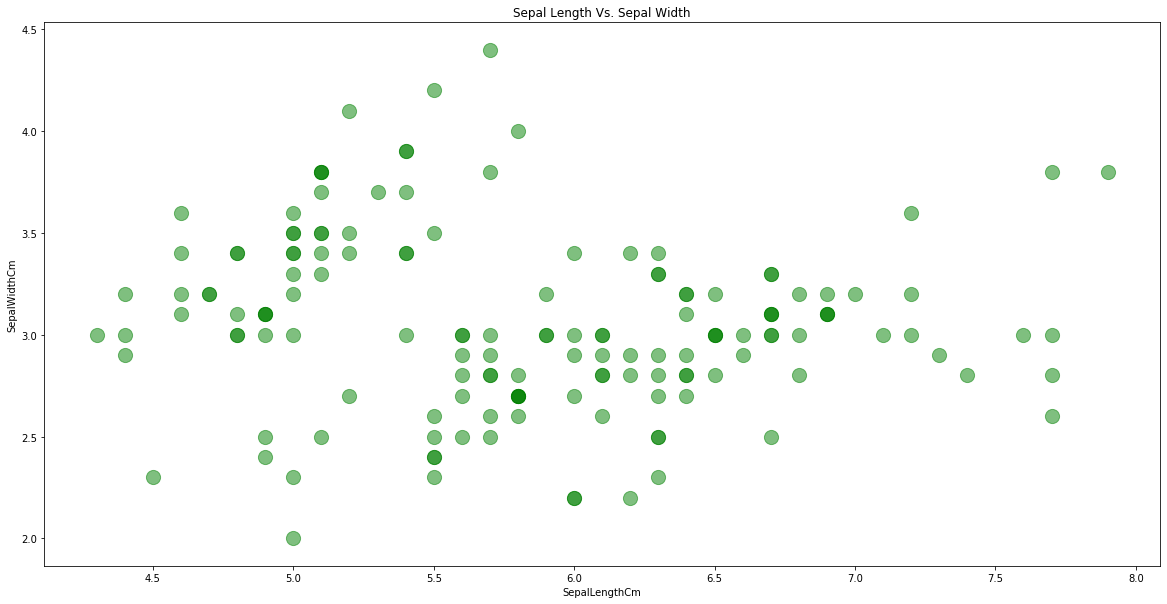

In [135]:
plt.figure(figsize=(20,10))
plt.scatter(iris['SepalLengthCm'], iris['SepalWidthCm'],s=200, alpha = 0.5, color="green")
plt.title('Sepal Length Vs. Sepal Width')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')

# Ініціалізуємо початкові значення методу

In [136]:
k = 3

In [137]:
centroids_x = np.random.uniform(min(iris['SepalLengthCm']), max(iris['SepalLengthCm']), size = k)
centroids_y = np.random.uniform(min(iris['SepalWidthCm']), max(iris['SepalWidthCm']), size = k)
print("centroids_x: ",centroids_x) 
print("centroids_y: ", centroids_y)

centroids_x:  [4.3709729  5.82955862 7.73105889]
centroids_y:  [3.51969282 2.28966756 4.24529797]


In [138]:
centroids = np.array(list(zip(centroids_x, centroids_y)))

In [139]:
centroids

array([[4.3709729 , 3.51969282],
       [5.82955862, 2.28966756],
       [7.73105889, 4.24529797]])

### Повторимо графік з початковими центрами

Text(0, 0.5, 'SepalWidthCm')

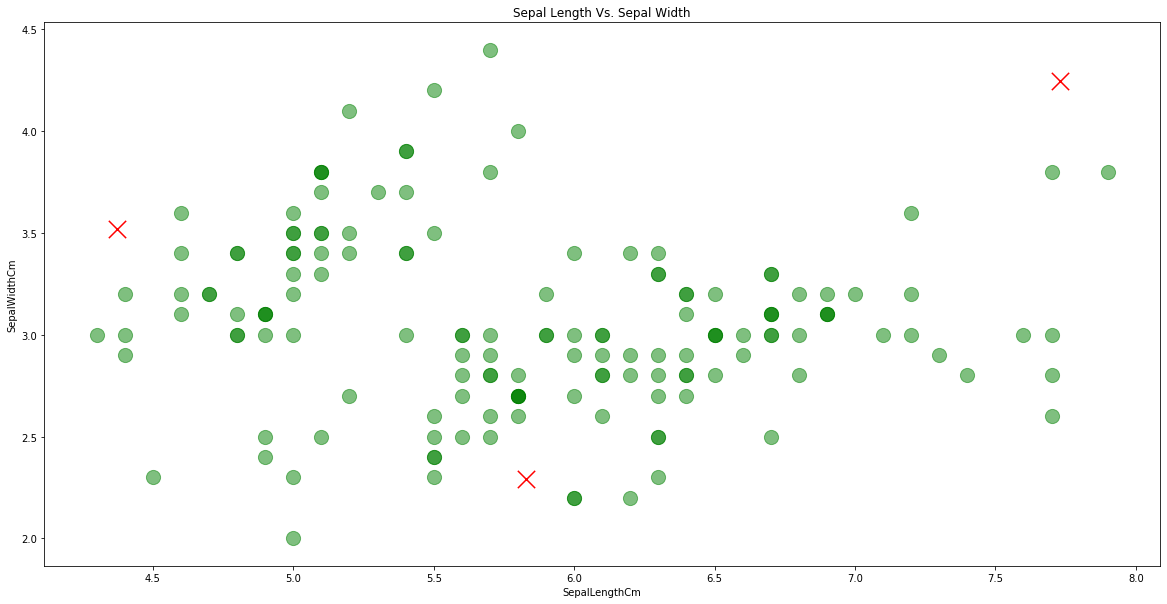

In [141]:
plt.figure(figsize=(20,10))
plt.scatter(iris['SepalLengthCm'], iris['SepalWidthCm'],s=200, alpha = 0.5, color="green")
plt.scatter(centroids_x, centroids_y, s=300,marker="x", color="red")
plt.title('Sepal Length Vs. Sepal Width')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')

In [142]:
labels = np.zeros(len(iris))

## Алгоритм

In [143]:
# виберемо за k значення 3
k = 3

x = iris['SepalLengthCm']
y = iris['SepalWidthCm']
# ініціалізуємо центри
centroids_x = np.random.uniform(min(x), max(x), size = k)
centroids_y = np.random.uniform(min(y), max(y), size = k)

centroids = np.array(list(zip(centroids_x, centroids_y)))

# створимо змінну для збережння старих значень
centroids_old = np.zeros(centroids.shape)

labels = np.zeros(len(iris))

distances = np.zeros(3)

# Відстань між новим і старим центрами
error = np.zeros(3)

error[0] = distance.euclidean(centroids[0], centroids_old[0])
error[1] = distance.euclidean(centroids[1], centroids_old[1])
error[2] = distance.euclidean(centroids[2], centroids_old[2])


while error.all() != 0:

    
    for i in range(len(df)):
        distances[0] = distance.euclidean(sepal_length_width[i], centroids[0])
        distances[1] = distance.euclidean(sepal_length_width[i], centroids[1])
        distances[2] = distance.euclidean(sepal_length_width[i], centroids[2])
        
        cluster = np.argmin(distances)
        
        labels[i] = cluster
    
    centroids_old = deepcopy(centroids)
    
    for i in range(3):
        points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
        centroids[i] = np.mean(points, axis = 0)
        
    error[0] = distance.euclidean(centroids[0], centroids_old[0])
    error[1] = distance.euclidean(centroids[1],   centroids_old[1])
    error[2] = distance.euclidean(centroids[2], centroids_old[2])

# Ще раз намалюємо графік після проходження алгоритму

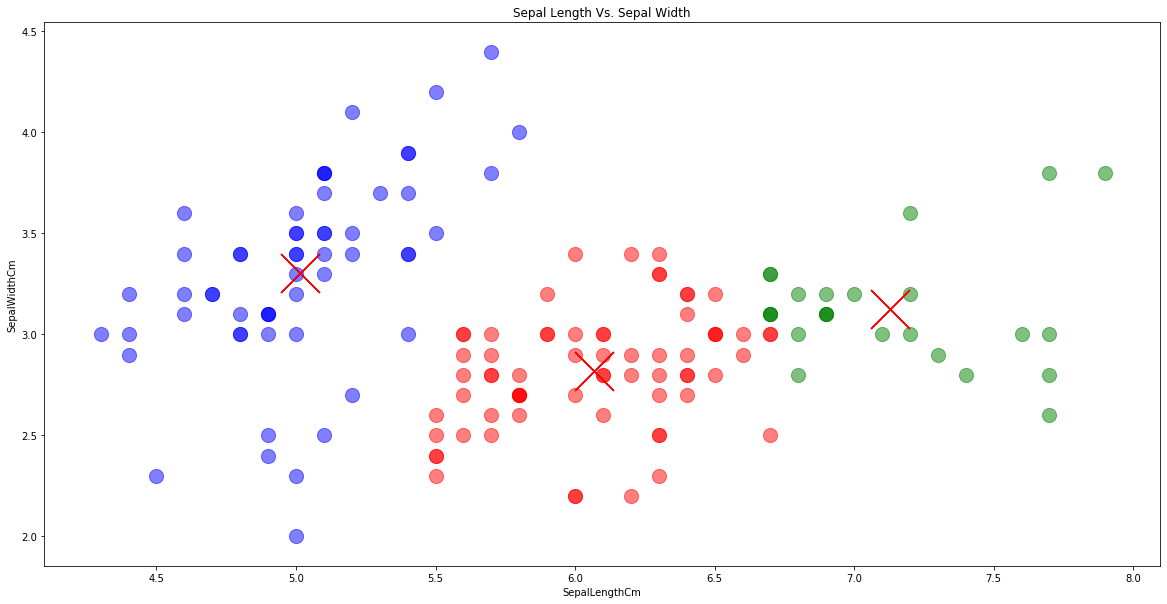

In [146]:
colors = ['red', 'green', 'blue']
plt.figure(figsize=(20,10))
for i in range(k):
    points = np.array([sepal_length_width[j] for j in range(len(df)) if labels[j] == i])
    plt.scatter(points[:, 0], points[:, 1], c = colors[i], alpha = 0.5, s=200)
    
    plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', color = "red", s = 1500)

    plt.title('Sepal Length Vs. Sepal Width')
    plt.xlabel('SepalLengthCm')
    plt.ylabel('SepalWidthCm')